First of all, we will visualize the normal behaviours of all 7 microservices belonging to the 3 apps

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

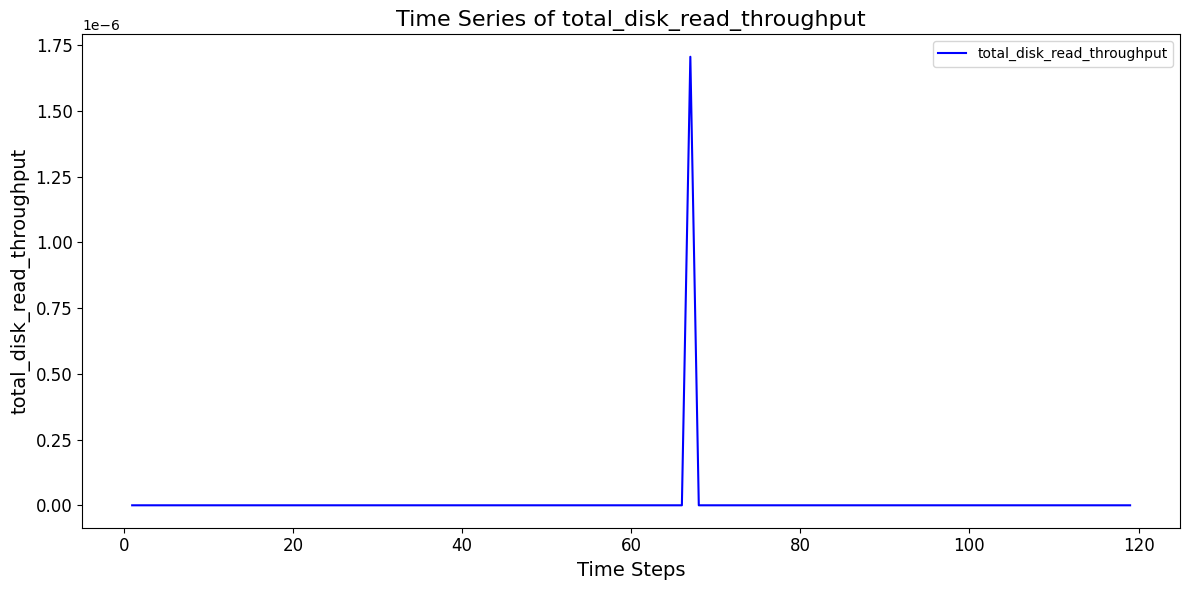

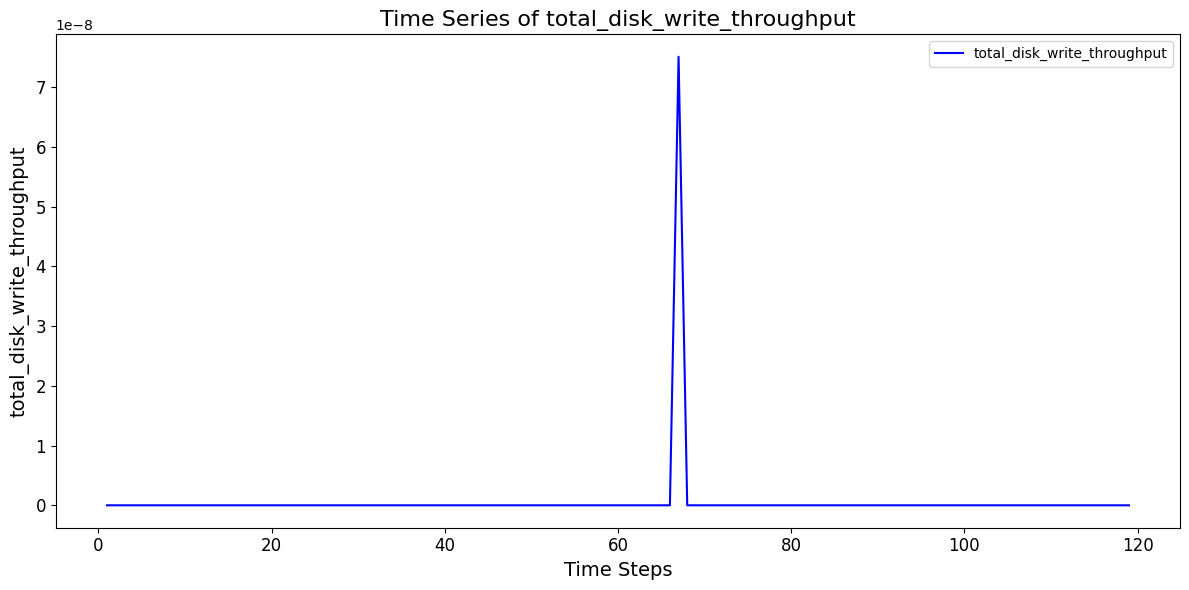

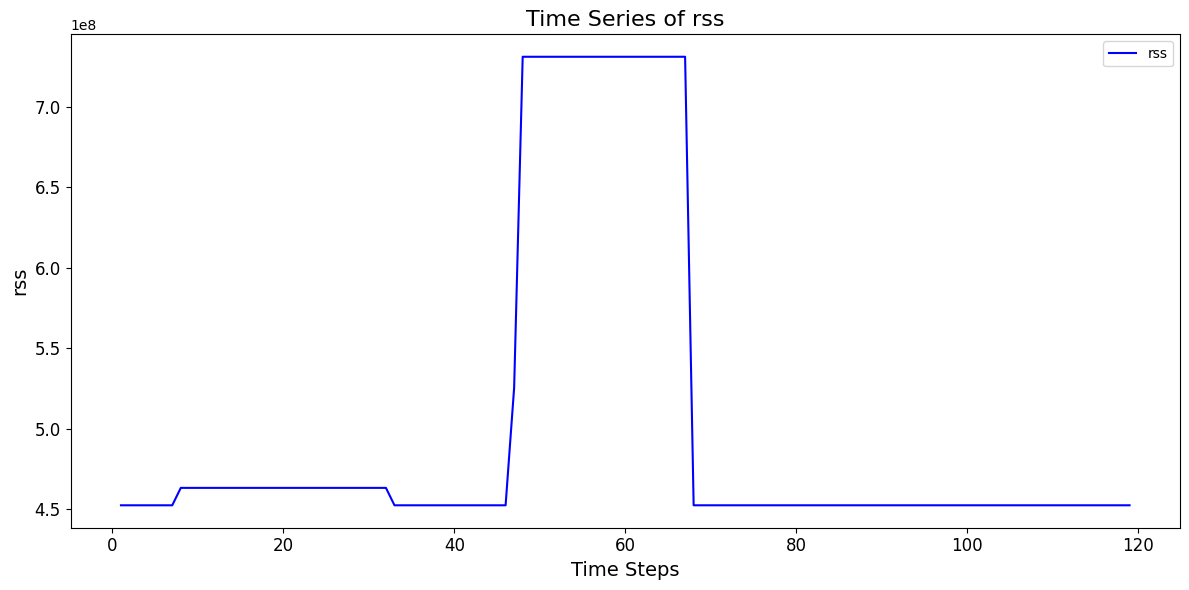

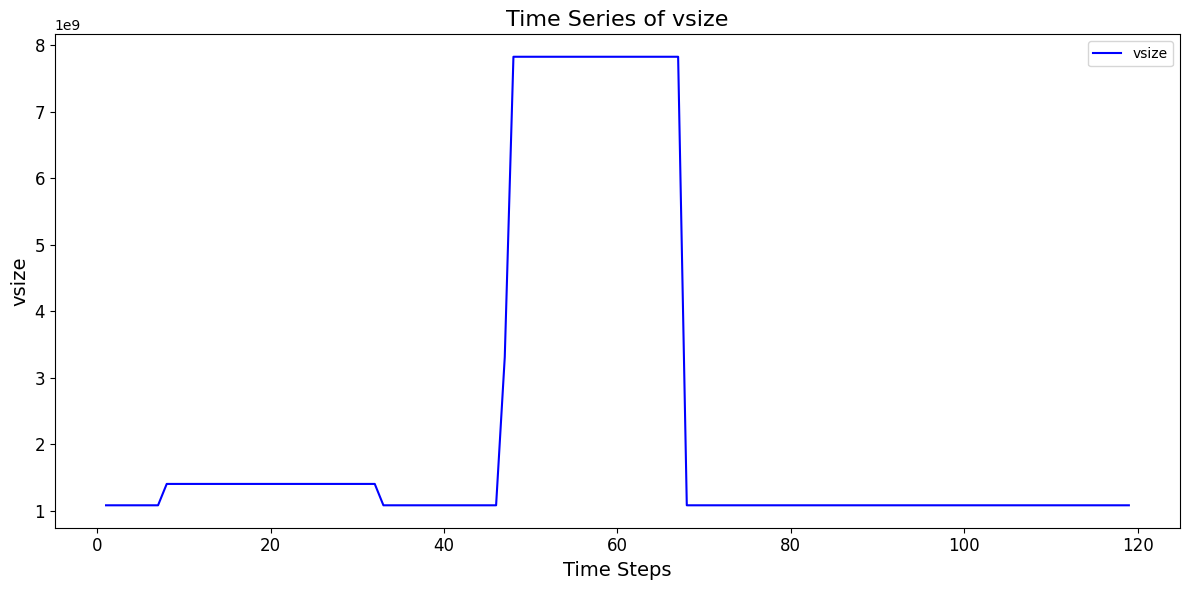

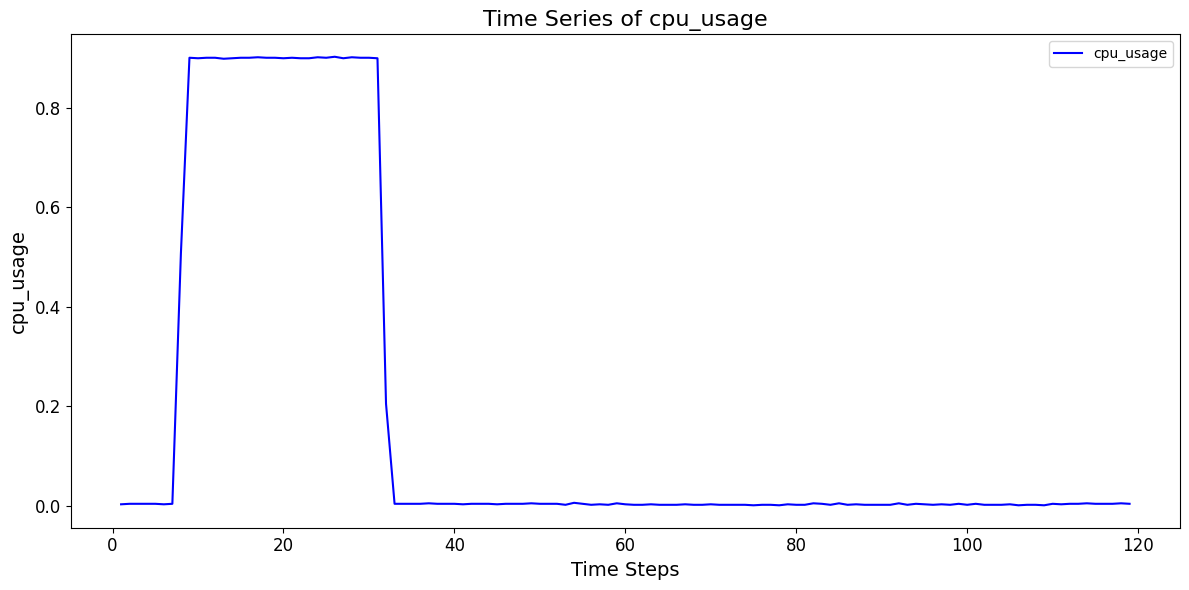

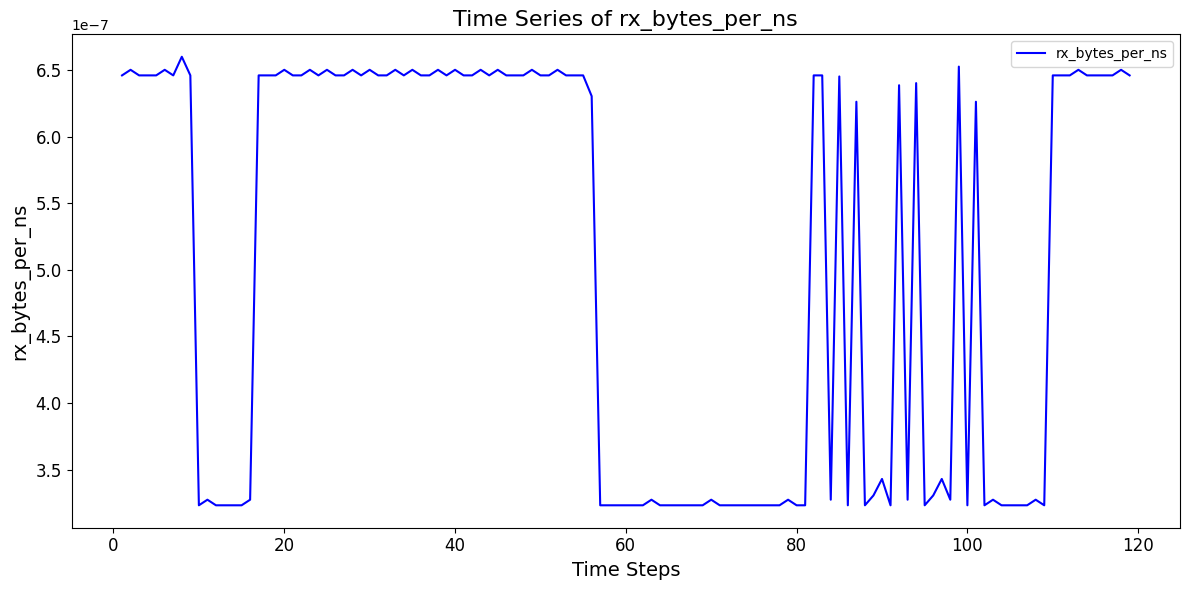

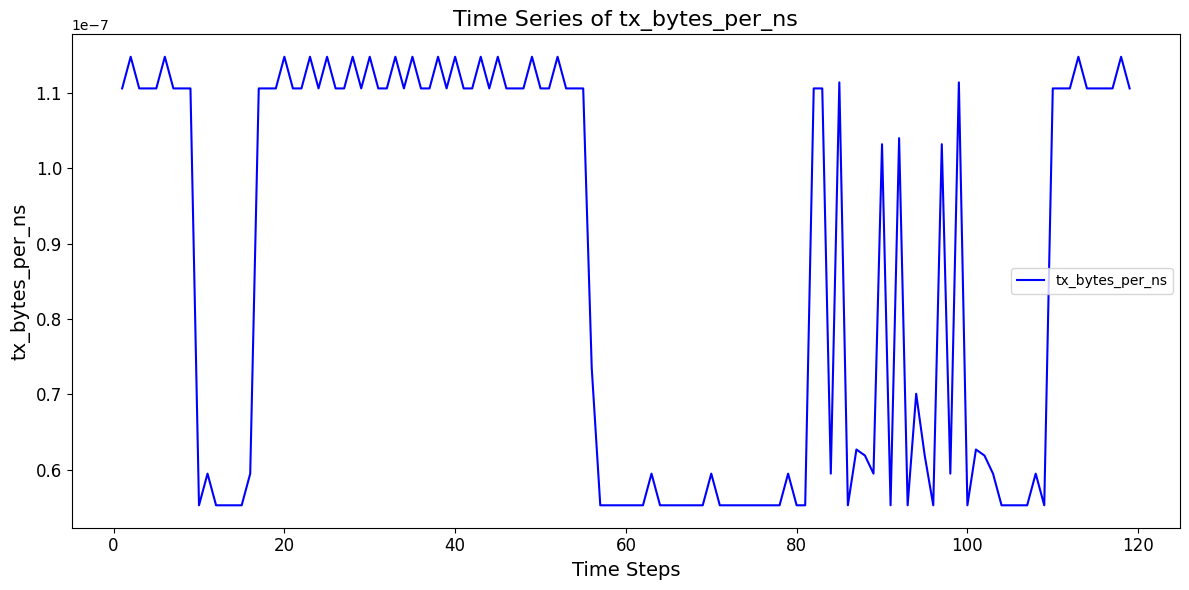

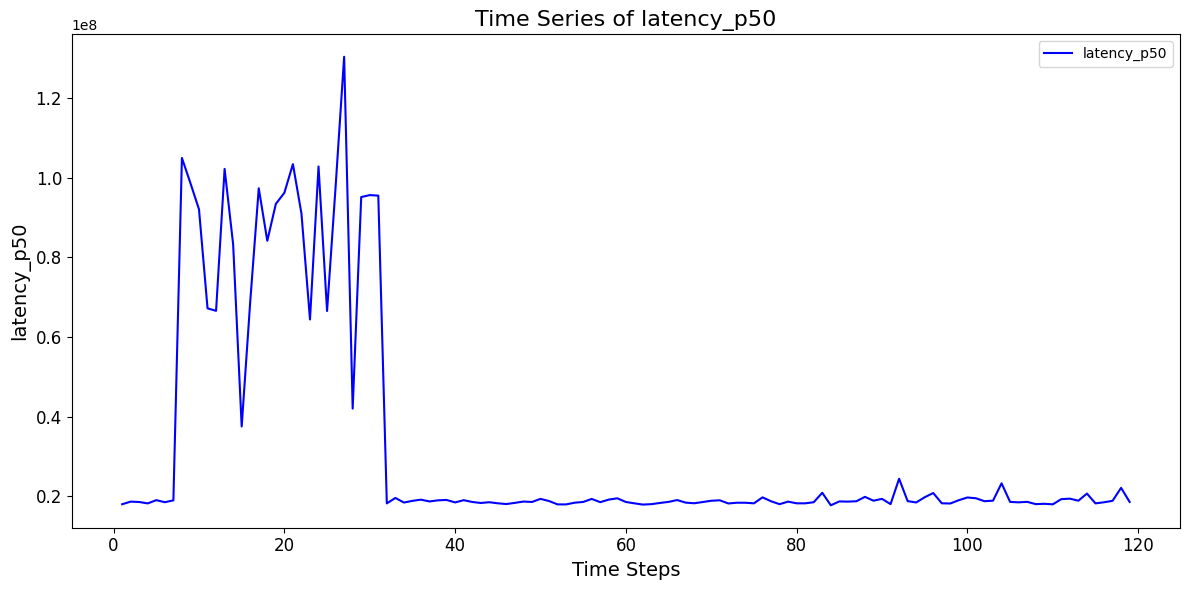

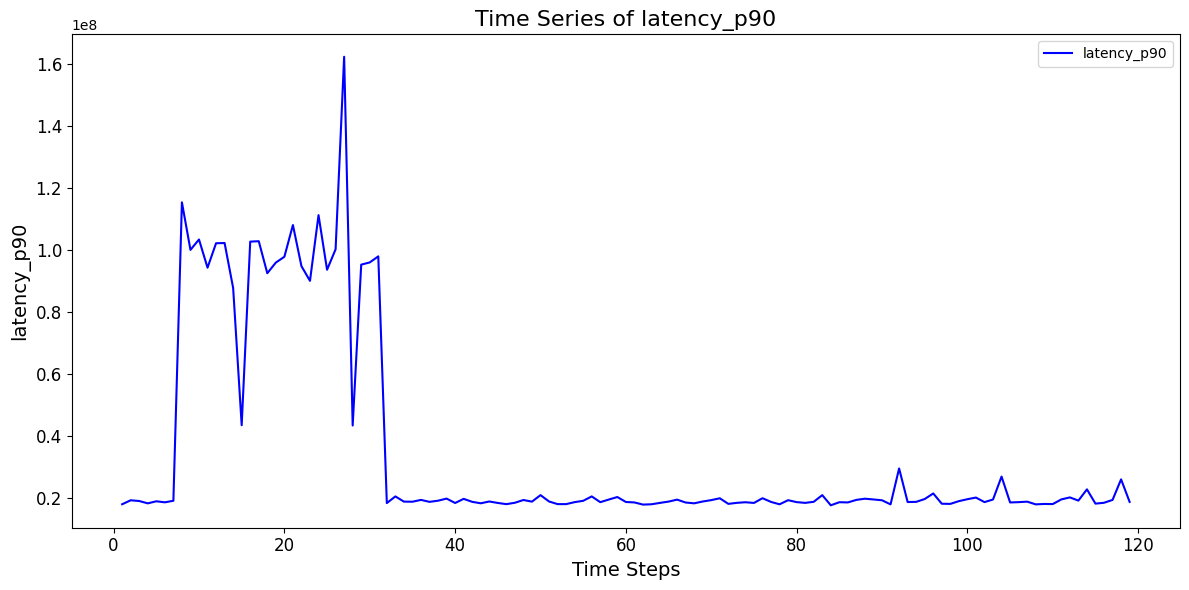

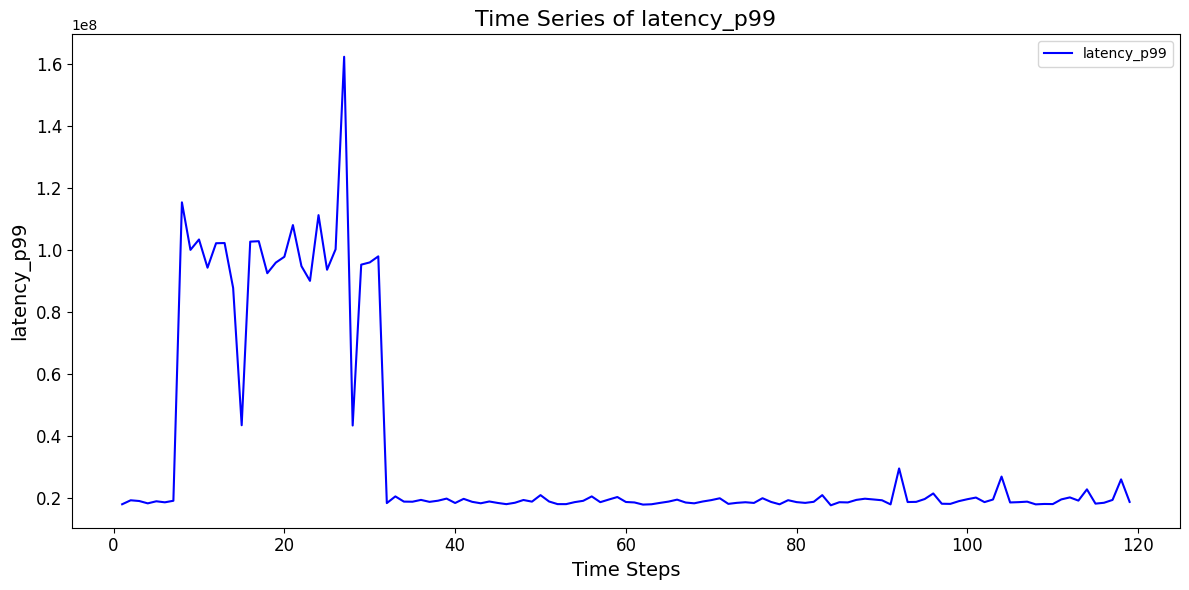

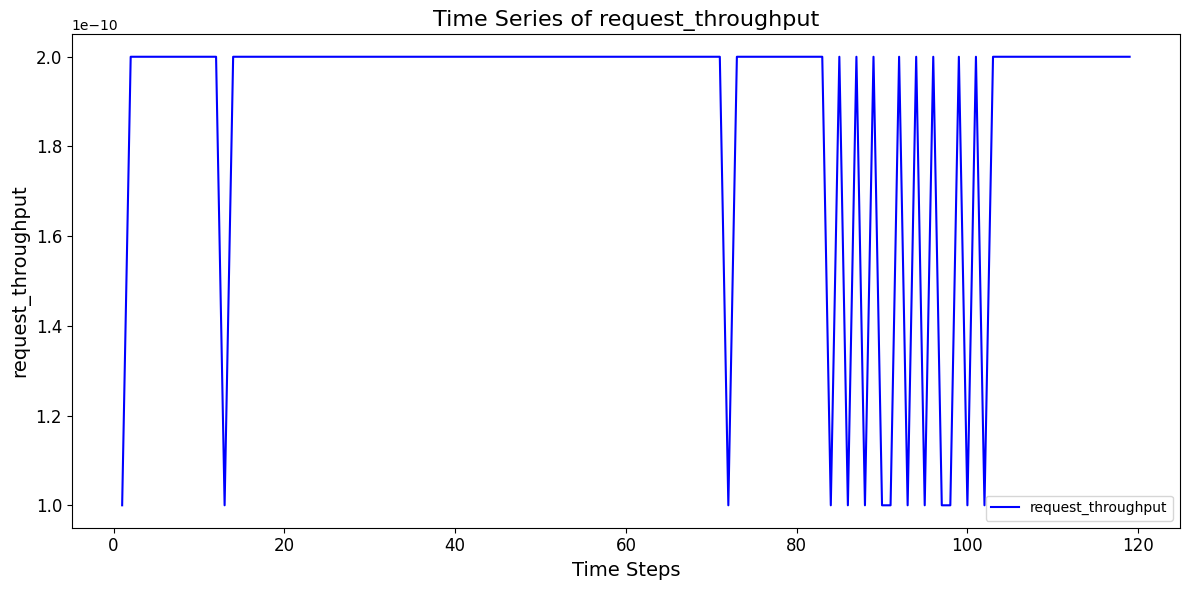

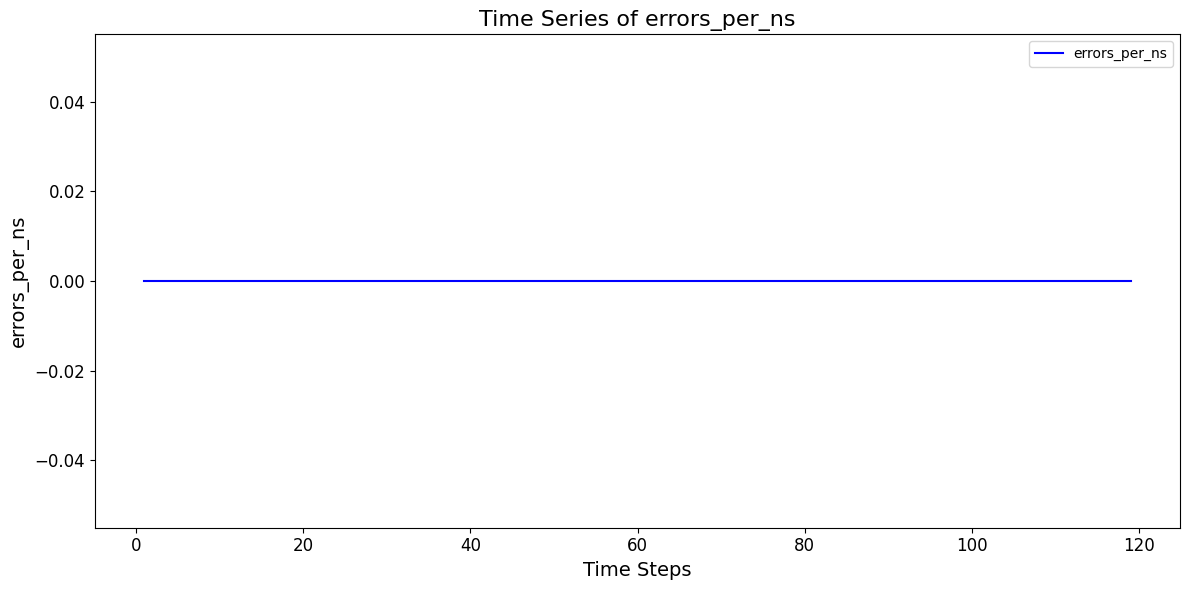

In [3]:
# Function to plot time series for all metrics in the file
def plot_timeseries_all_metrics(file_name, exclude_columns=['microservice']):
    # Load the CSV file
    df = pd.read_csv(file_name)
    
    # Filter out any columns that should be excluded (e.g., 'microservice')
    metrics = [col for col in df.columns if col not in exclude_columns]
    
    # Generate a time index based on the row number (sequential time steps)
    time_index = range(1, len(df) + 1)
    
    # Plot the time series for each metric
    for metric in metrics:
        plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
        plt.plot(time_index, df[metric], label=metric, color='b')
        
        # Add labels and title
        plt.title(f'Time Series of {metric}', fontsize=16)
        plt.xlabel('Time Steps', fontsize=14)
        plt.ylabel(metric, fontsize=14)
        
        # Increase the font size of x and y axis tick values
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        # Show the legend
        plt.legend()
        
        # Display the plot
        plt.tight_layout()
        plt.show()

# Example usage:
# Provide the file name
file_name = 'sample_dataset_for_analysis/merged_timeseries_ad_nontimesynced_v1_other_anomaly.csv' #'merged_timeseries_ad_first_sample.csv'
plot_timeseries_all_metrics(file_name)

Repeat the analysis done for the paper with new data samples

In [5]:
# Function to load and concatenate all CSV files from a folder
def load_data_from_folder(folder_path):
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Paths to the normal and anomaly data folders
normal_data_folder = 'sample_dataset_for_analysis/normal_data'

# Load and concatenate CSV files from each folder
normal_df = load_data_from_folder(normal_data_folder)

# Obtain statistical summary for the normal dataset
normal_stats = normal_df.describe()

# Display the statistical summaries
print("Statistical Summary for Normal Dataset:")
print(normal_stats)

Statistical Summary for Normal Dataset:
       total_disk_read_throughput  total_disk_write_throughput           rss  \
count                  957.000000                 9.570000e+02  9.570000e+02   
mean                     0.002605                 2.605169e-03  3.202286e+08   
std                      0.006379                 6.382111e-03  1.999931e+08   
min                      0.000000                 0.000000e+00  3.556762e+07   
25%                      0.000000                 0.000000e+00  4.109189e+07   
50%                      0.000000                 4.500000e-08  4.421358e+08   
75%                      0.000013                 6.476100e-06  4.714242e+08   
max                      0.022314                 2.231602e-02  5.828047e+08   

              vsize   cpu_usage  rx_bytes_per_ns  tx_bytes_per_ns  \
count  9.570000e+02  957.000000     9.540000e+02       954.000000   
mean   1.668549e+09    0.189837     2.709491e-03         0.000023   
std    6.512585e+08    0.302166 

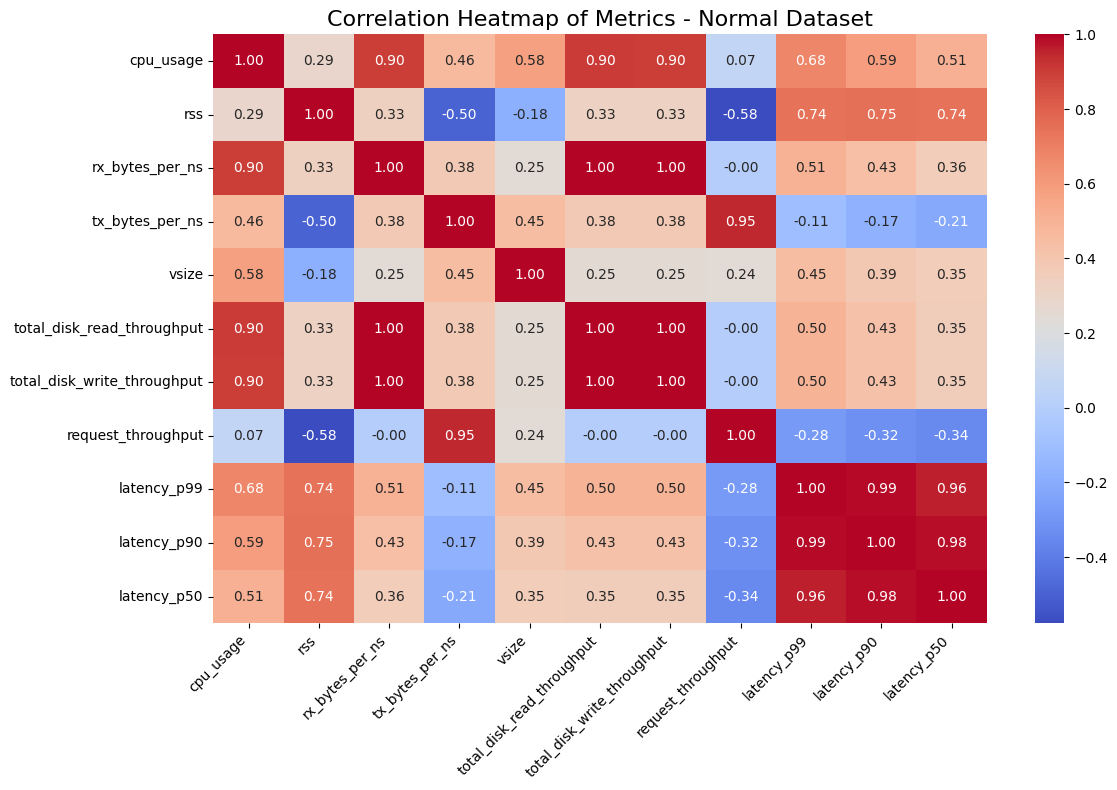

In [10]:
# For analysis - only with the normal dataset

# Function to load and concatenate all CSV files from a folder
def load_data_from_folder(folder_path):
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Path to the normal data folder
normal_data_folder = 'sample_dataset_for_analysis/normal_data'

# Load and concatenate CSV files from the normal folder
normal_df = load_data_from_folder(normal_data_folder)

# Compute the correlation matrix for the normal dataset
correlation_matrix = normal_df.corr()

# Define the desired order of metrics
metric_order = [
    'cpu_usage','rss','rx_bytes_per_ns','tx_bytes_per_ns','vsize','total_disk_read_throughput', 'total_disk_write_throughput',  
     'request_throughput','latency_p99','latency_p90','latency_p50']

# Reorder the correlation matrix using the specified order
correlation_matrix = correlation_matrix.reindex(index=metric_order, columns=metric_order)

# # Compute the correlation matrix for the normal dataset
# correlation_matrix = normal_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title('Correlation Heatmap of Metrics - Normal Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the heatmap
plt.tight_layout()
plt.show()

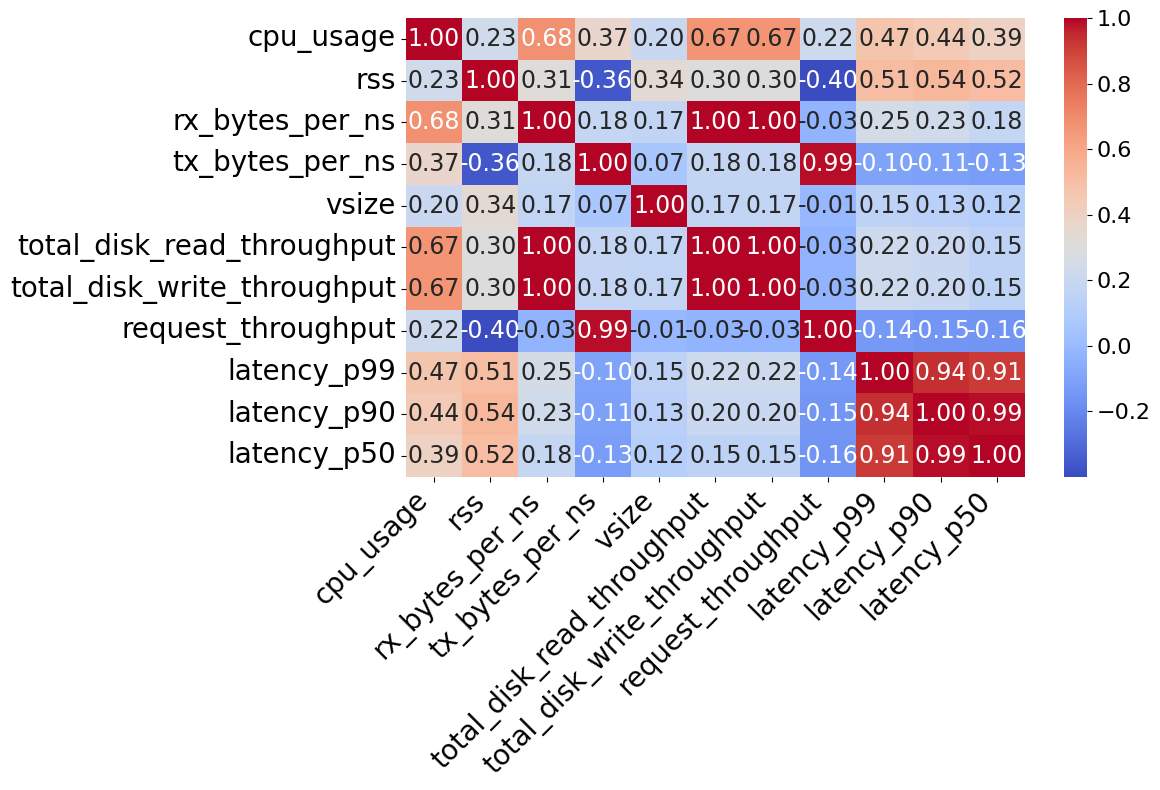

In [4]:
# For analysis - with both normal and anomaly datasets

# Function to load and concatenate all CSV files from a folder
def load_data_from_folder(folder_path):
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Path to the normal data folder
combined_data_folder = 'sample_dataset_for_analysis/altogether'

# Load and concatenate CSV files from the normal folder
normal_df = load_data_from_folder(combined_data_folder)

# Compute the correlation matrix for the normal dataset
correlation_matrix = normal_df.corr()

# Define the desired order of metrics
metric_order = [
    'cpu_usage','rss','rx_bytes_per_ns','tx_bytes_per_ns','vsize','total_disk_read_throughput', 'total_disk_write_throughput',  
     'request_throughput','latency_p99','latency_p90','latency_p50']

# Reorder the correlation matrix using the specified order
correlation_matrix = correlation_matrix.reindex(index=metric_order, columns=metric_order)

# # Compute the correlation matrix for the normal dataset
# correlation_matrix = normal_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap using seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 17})

# Increase the font size of the color bar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Set color bar tick font size


# Add title and labels
# plt.title('Correlation Heatmap of Metrics - Normal Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Display the heatmap
plt.tight_layout()
plt.savefig(f'colinearity_plot.png')
plt.show()


/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_3825/451409177.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot(combined_data, labels=all_files, patch_artist=True, boxprops=boxprops, medianprops=medianprops,
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_3825/451409177.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot(combined_data, labels=all_files, patch_artist=True, boxprops=boxprops, medianprops=medianprops,
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_3825/451409177.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot(combine

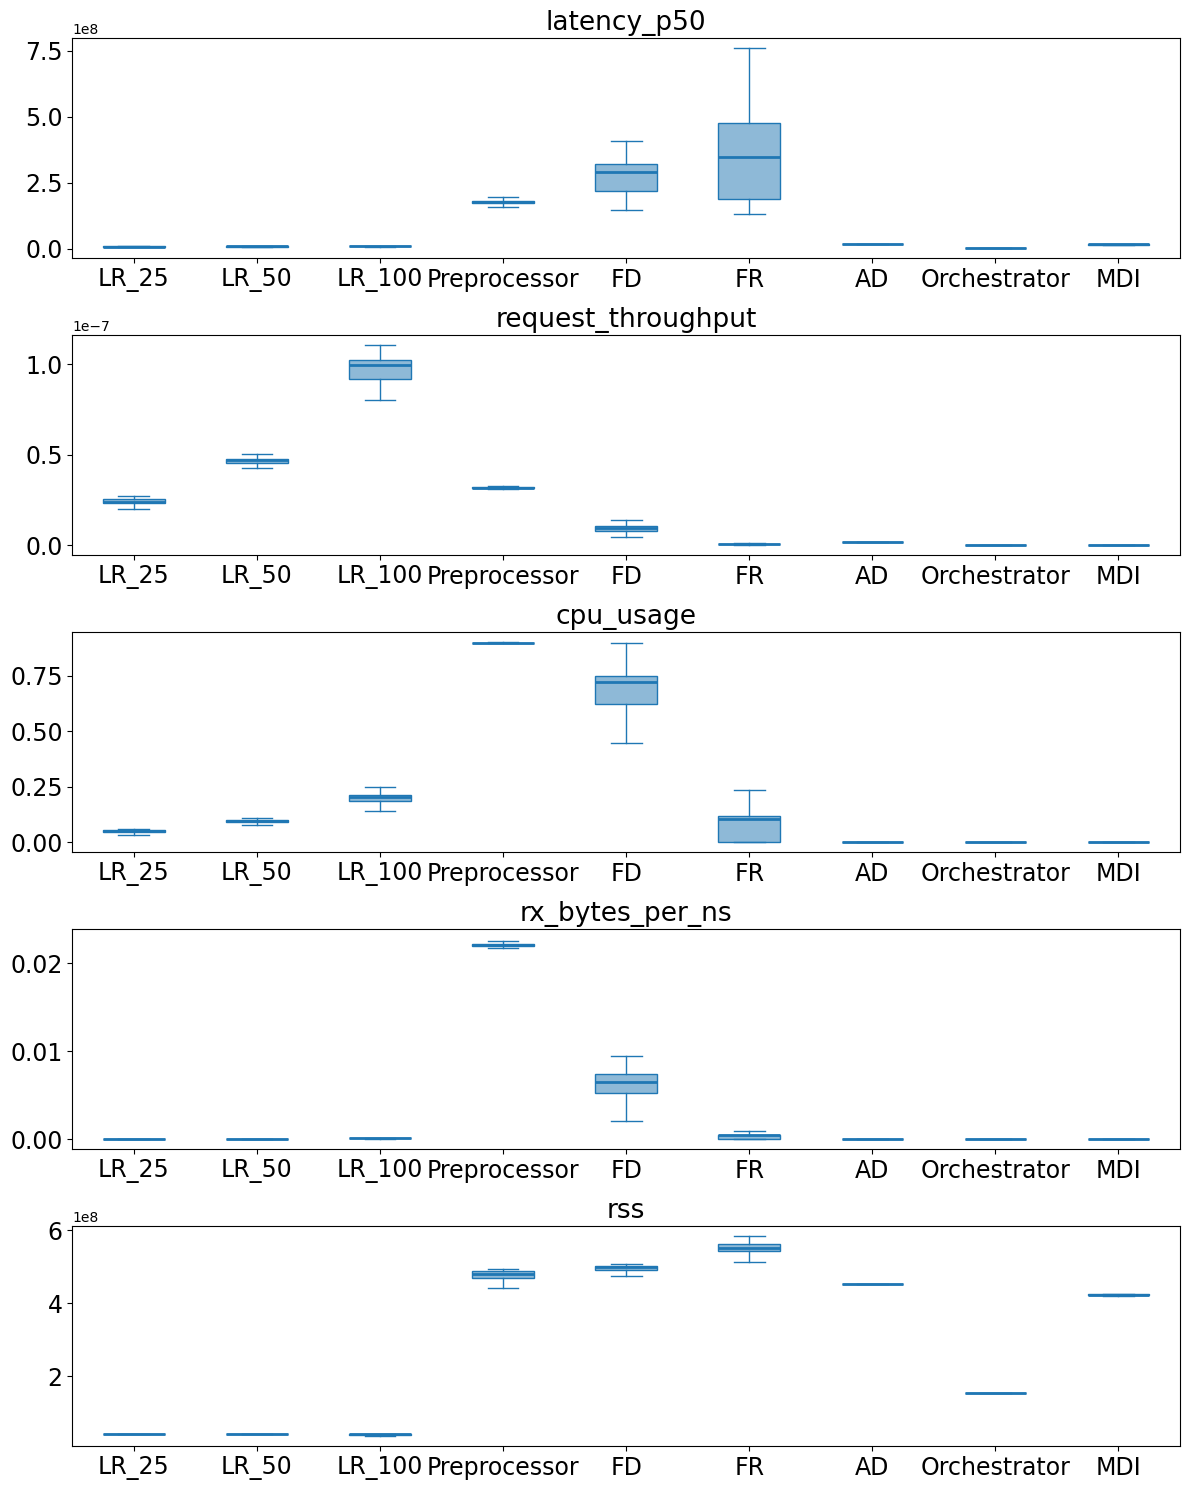

In [5]:
# Function to load all CSV files, order them, and create vertical box plots for each metric
def box_plot_metrics_ordered(normal_data_folder, exclude_columns=['microservice']):
    # List all CSV files in the folder
    all_files = [f for f in os.listdir(normal_data_folder) if f.endswith('.csv')]
    
    desired_order = ['locret_normal_25','locret_normal_50','locret_normal_100', 'preprocess_normal', 'fd_normal', 'fr_normal', 'ad_normal_timesynced', 'orch_normal', 'mdi_normal']
    # Sort files according to the desired order (ensure that only listed files are included)
    all_files = [f for f in desired_order if f + '.csv' in all_files]
    
    # Dictionary to store metric values from all files
    metric_data = {}
    
    for file in all_files:
        # Load each CSV file
        df = pd.read_csv(os.path.join(normal_data_folder, file + '.csv'))
        
        # Filter out non-numeric columns (like 'microservice')
        metrics = [col for col in df.columns if col not in exclude_columns and pd.api.types.is_numeric_dtype(df[col])]
        metrics = ['latency_p50','request_throughput','cpu_usage','rx_bytes_per_ns','rss'] # 'total_disk_read_throughput','total_disk_write_throughput','vsize','tx_bytes_per_ns', ,'latency_p90','latency_p99'
        
        for metric in metrics:
            # Store the values for each metric across files
            if metric not in metric_data:
                metric_data[metric] = []
            
            metric_data[metric].append(df[metric].dropna().values)
    
    # Plot box plots for each metric
    num_metrics = len(metric_data)
    fig, axs = plt.subplots(num_metrics, 1, figsize=(12, 3 * num_metrics))
    
    if num_metrics == 1:
        axs = [axs]  # Make sure axs is always iterable
    
    for i, metric in enumerate(metric_data):
        # Combine the values for the current metric across all files
        combined_data = metric_data[metric]

        # Set properties for box plots (no outliers and custom fill color)
        boxprops = dict(facecolor='#8eb9d7', color='#1f77b4')
        medianprops = dict(color='#1f77b4', linewidth=2)
        whiskerprops = dict(color='#1f77b4')
        capprops = dict(color='#1f77b4')
        flierprops = dict(markerfacecolor='none', markeredgecolor='none')  # Removes the outlier points
        
        
        # Plot a vertical box plot for the current metric
        axs[i].boxplot(combined_data, labels=all_files, patch_artist=True, boxprops=boxprops, medianprops=medianprops,
                       whiskerprops=whiskerprops, capprops=capprops,
                       flierprops=flierprops)
        axs[i].set_title(f'{metric}', fontsize=19)
        # axs[i].set_xlabel('Files', fontsize=14)
        # axs[i].set_ylabel(metric, fontsize=14)
        # axs[i].tick_params(axis='x', labelsize=12, rotation=45)  # Rotate file labels
        # Set the font size of the y-axis values (tick labels)
        axs[i].tick_params(axis='y', labelsize=17)  # Increase the font size of y-axis values
        
        new_labels = ['LR_25', 'LR_50', 'LR_100', 'Preprocessor', 'FD', 'FR', 'AD', 'Orchestrator', 'MDI']  # Update this list with your desired labels
        axs[i].set_xticklabels(new_labels, fontsize=17)
    
    plt.tight_layout()
    plt.savefig('box_plots.png')
    plt.show()

# Example usage:
# Provide the path to the normal data folder
normal_data_folder = 'sample_dataset_for_analysis/normal_data'
box_plot_metrics_ordered(normal_data_folder)

/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)


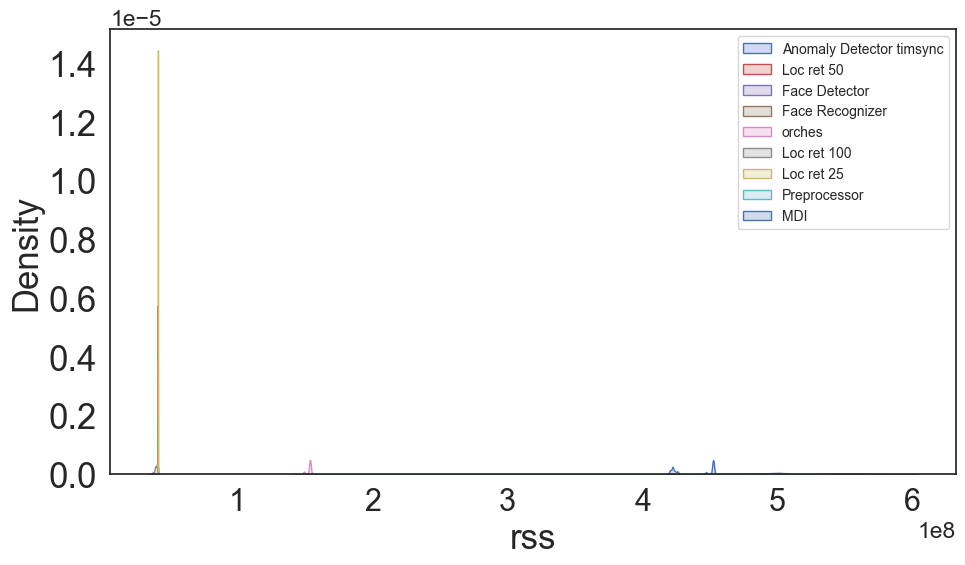

/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)


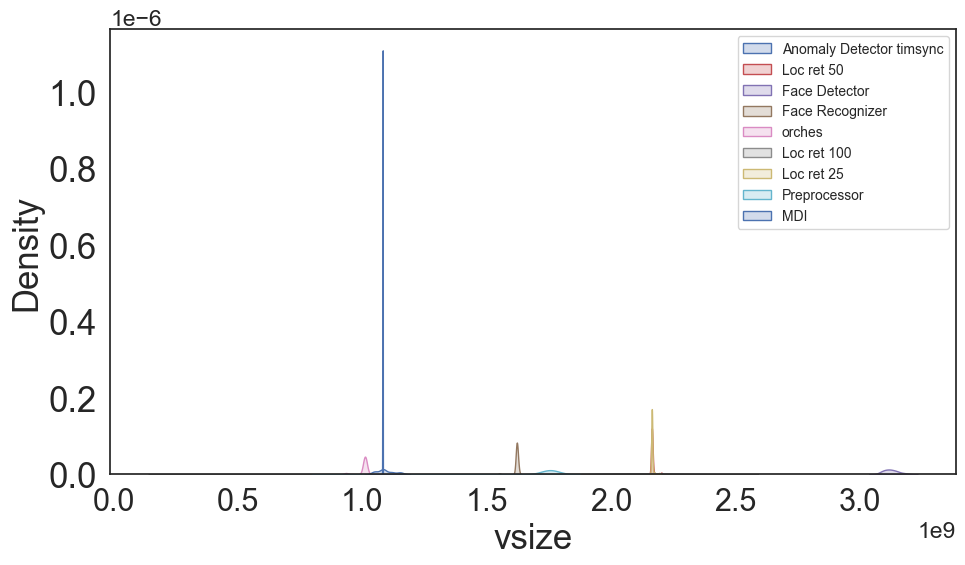

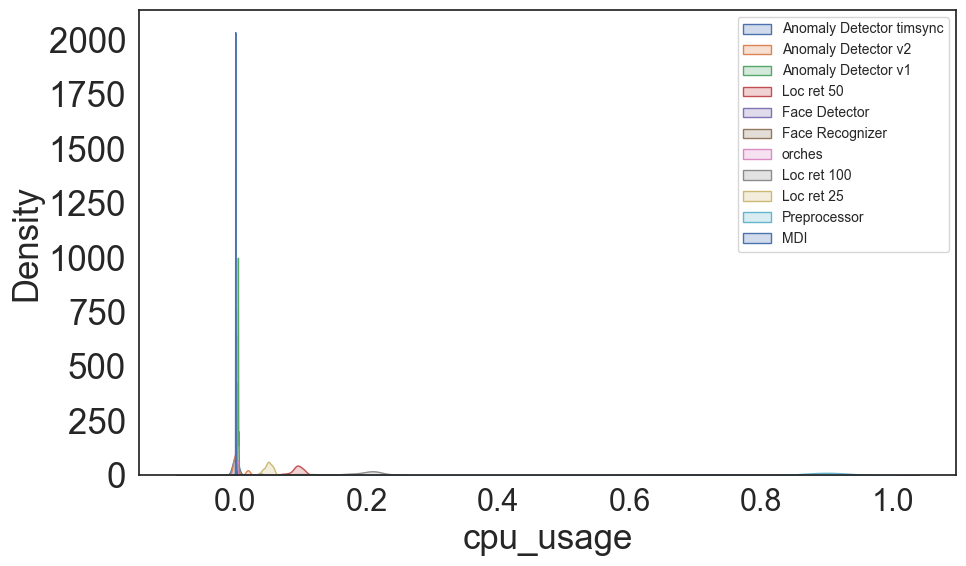

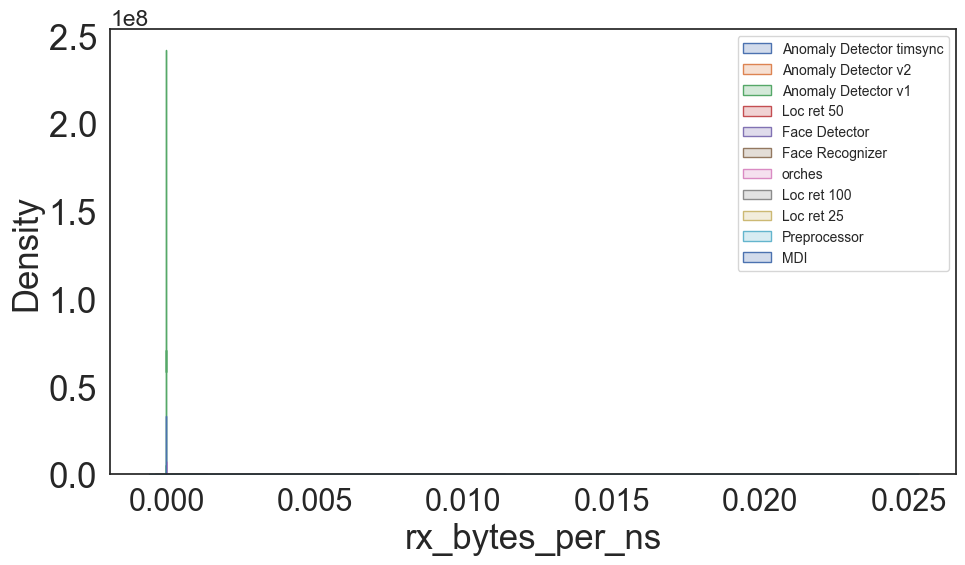

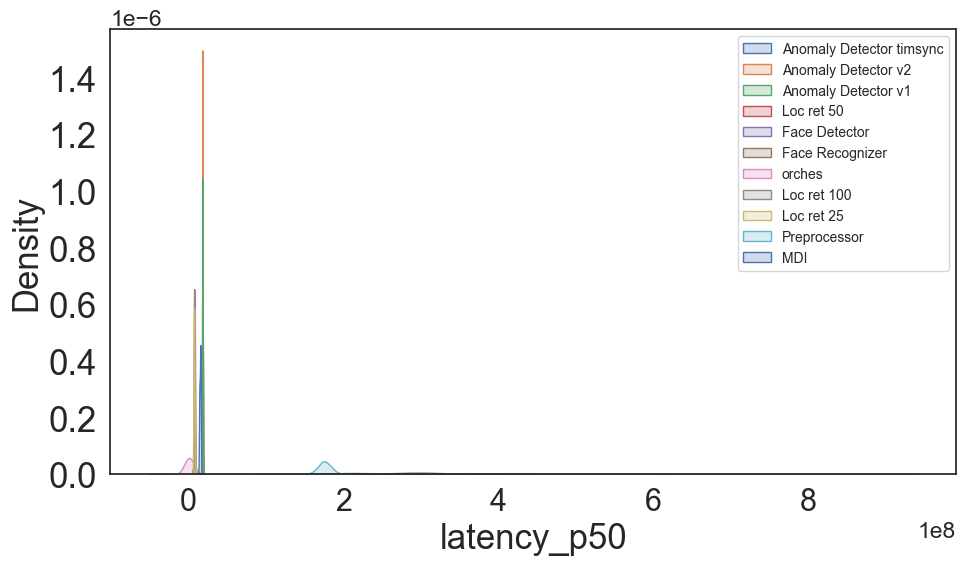

/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)


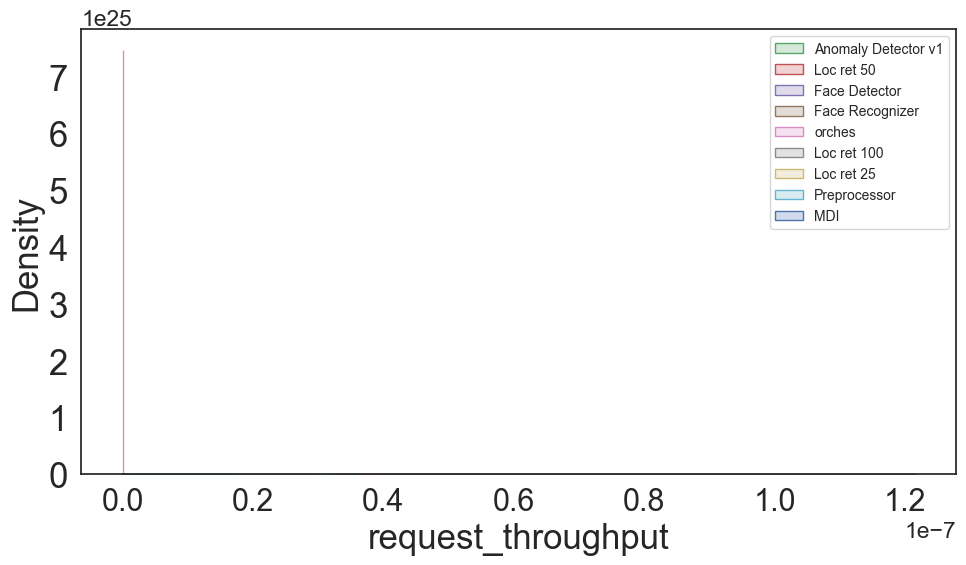

/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)


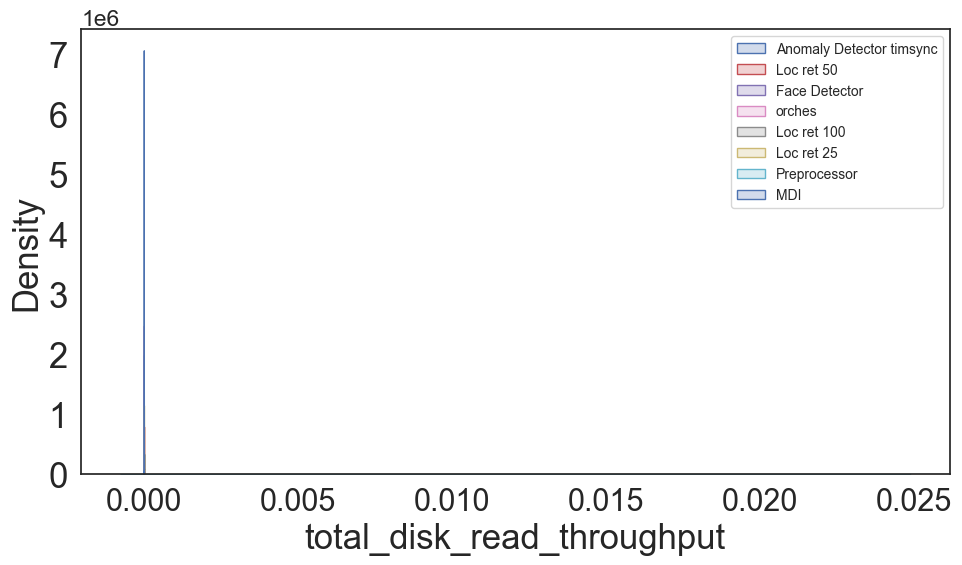

/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
/var/folders/hr/r8t23w5n4wj_vq1tp0bmchz80000gn/T/ipykernel_8847/803458887.py:55: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_s

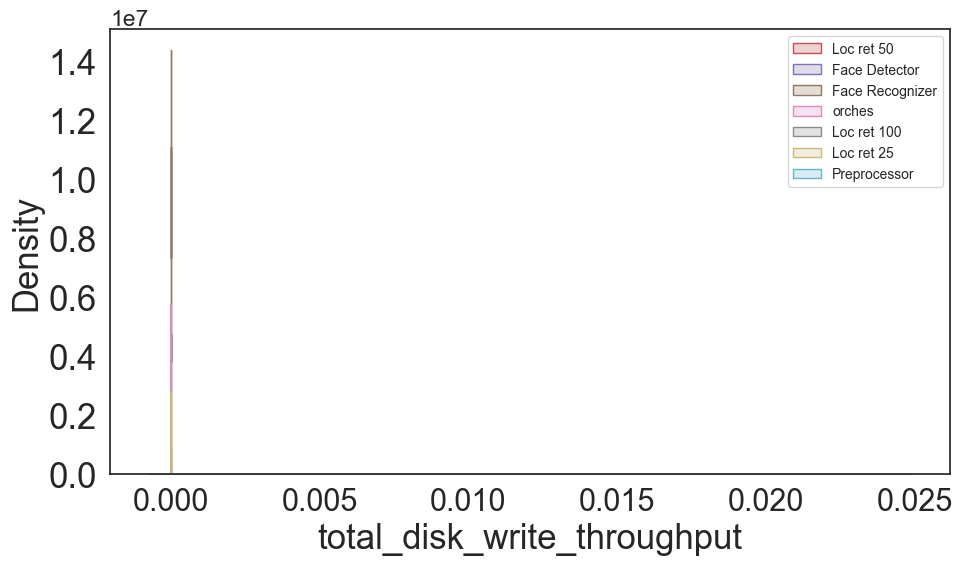

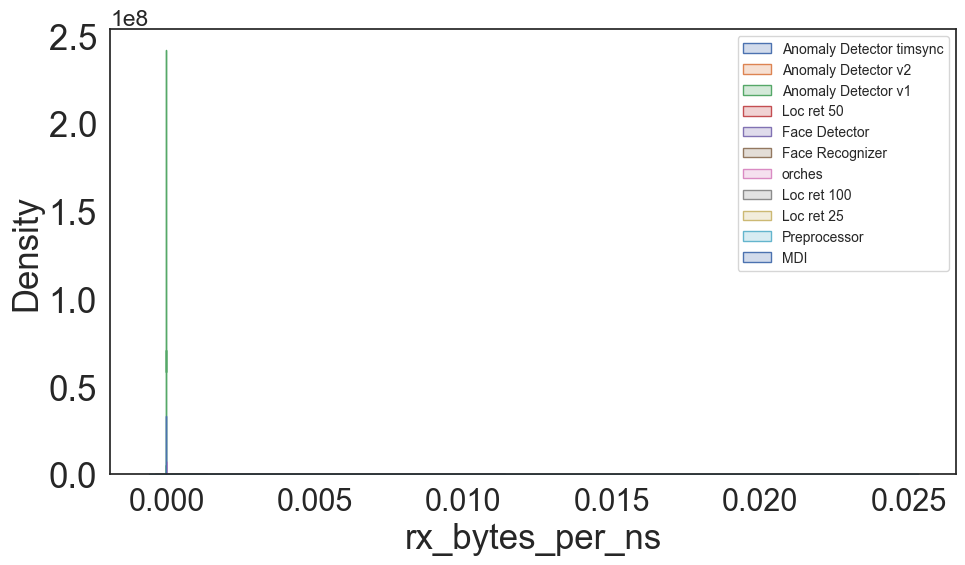

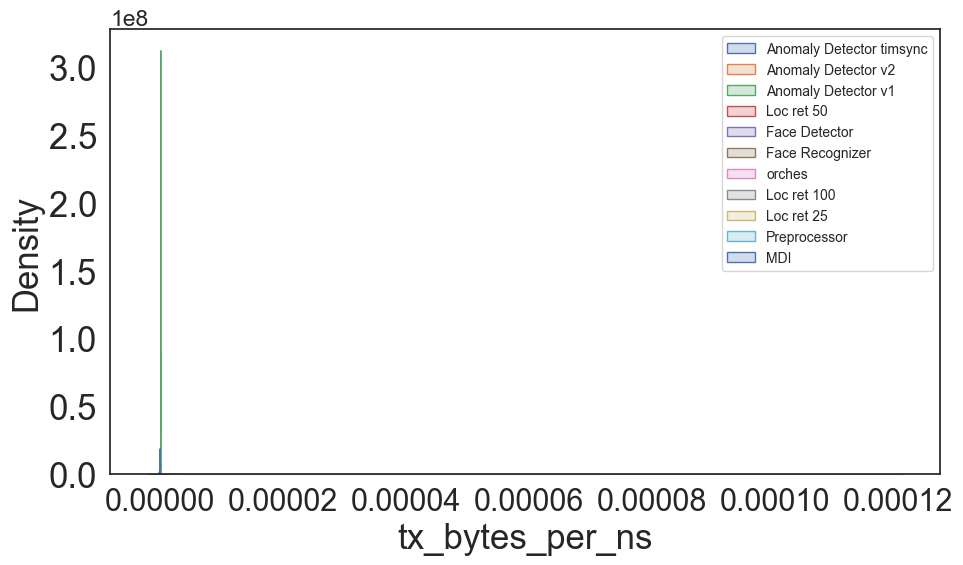

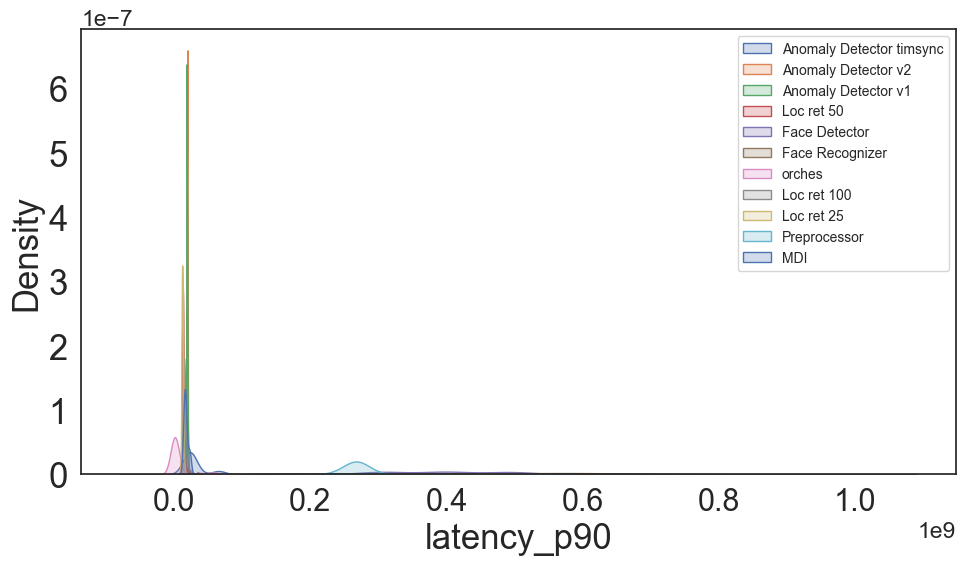

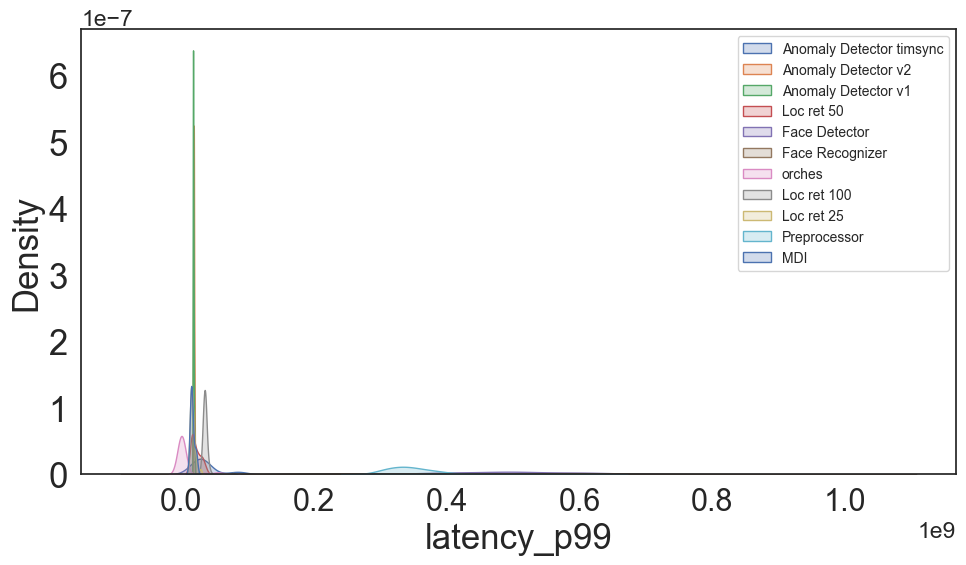

In [17]:
# Function to load and concatenate all CSV files from a folder
def load_data_from_folder(folder_path):
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = []
    
    for file in all_files:
        # Load each CSV file
        df = pd.read_csv(os.path.join(folder_path, file))
        
        # Extract the microservice name from the filename (assuming filename structure is 'microservice_data.csv')
        microservice_name = file.split('.csv')[0]  # Extract part before first '_'
        
        # Add the 'microservice' column
        df['microservice'] = microservice_name
        
        # Append the dataframe to the list
        df_list.append(df)
        
    return pd.concat(df_list, ignore_index=True)

# Path to the normal data folder
normal_data_folder = 'sample_dataset_for_analysis/normal_data'

# Load and concatenate CSV files from the normal folder
normal_df = load_data_from_folder(normal_data_folder)

# Assume we have a column 'microservice' that indicates the microservice for each entry
# If you don't have this column, you will need to add it based on your data structure.
# normal_df['microservice'] = [...]

# List of metrics to plot PDFs for
metrics = ['rss', 'vsize', 'cpu_usage', 'rx_bytes_per_ns', 'latency_p50', 'request_throughput', 'total_disk_read_throughput', 'total_disk_write_throughput', 'rx_bytes_per_ns', 'tx_bytes_per_ns', 'latency_p90', 'latency_p99']

# List of unique microservices (assuming they are identified in a 'microservice' column)
microservices = normal_df['microservice'].unique()

# Set global font scaling for seaborn
sns.set(font_scale=1.5)  # Adjust the font scale to make everything larger (increase/decrease as needed)

# Set style to remove the blue background
sns.set_style("white")  # Options: "white", "whitegrid", "dark", "darkgrid", "ticks"

# Generate a PDF plot for each metric across different microservices
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Plot the PDF for each microservice
    for microservice in microservices:
        # Filter the data for the current microservice
        microservice_data = normal_df[normal_df['microservice'] == microservice]

        label_dict = {'fd_normal':'Face Detector','fr_normal':'Face Recognizer', 'preprocess_normal':'Preprocessor', 'locret_normal_25':'Loc ret 25','locret_normal_50':'Loc ret 50','locret_normal_100':'Loc ret 100', 'ad_normal_nontimesynced_v1':'Anomaly Detector v1', 'ad_normal_nontimesynced_v2':'Anomaly Detector v2', 'ad_normal_timesynced':'Anomaly Detector timsync', 'mdi_normal':'MDI', 'orch_normal':'orches'}
        
        # Plot the KDE (PDF) for the metric
        sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
    
    # Add title and labels
    # plt.title(f'PDF of {metric} for Different Microservices', fontsize=16)
    plt.xlabel(f'{metric}', fontsize=25)
    plt.ylabel('Density', fontsize=25)

    # Increase the font size of x and y axis tick values
    plt.xticks(fontsize=22)  # Increase x-axis tick font size
    plt.yticks(fontsize=25)  # Increase y-axis tick font size
        
    plt.legend(fontsize=10)
    
    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(f'pdf_{metric}.png')
    
    # Show the plot
    plt.show()


['ad_normal_timesynced' 'locret_normal_50' 'fd_normal' 'fr_normal'
 'orch_normal' 'locret_normal_100' 'locret_normal_25' 'preprocess_normal'
 'mdi_normal']


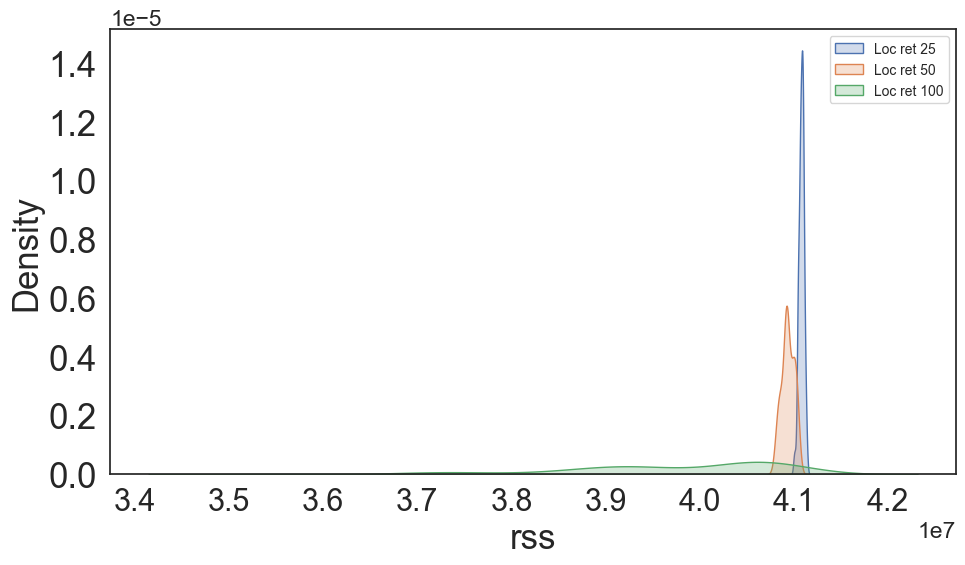

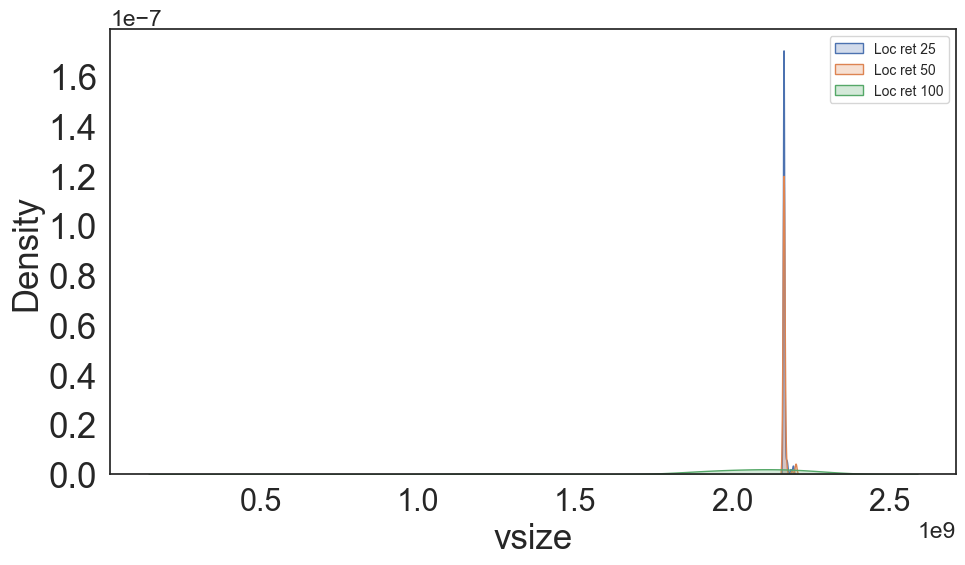

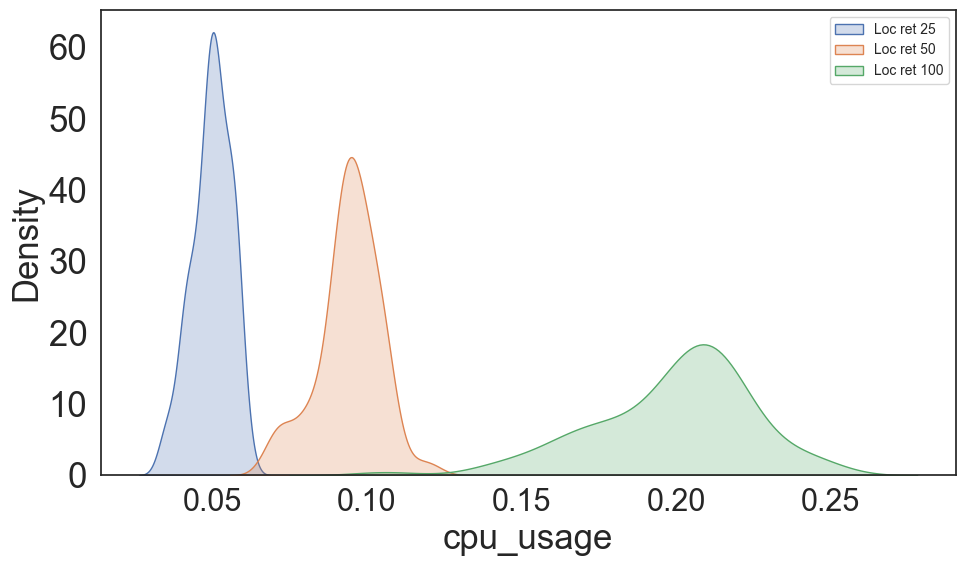

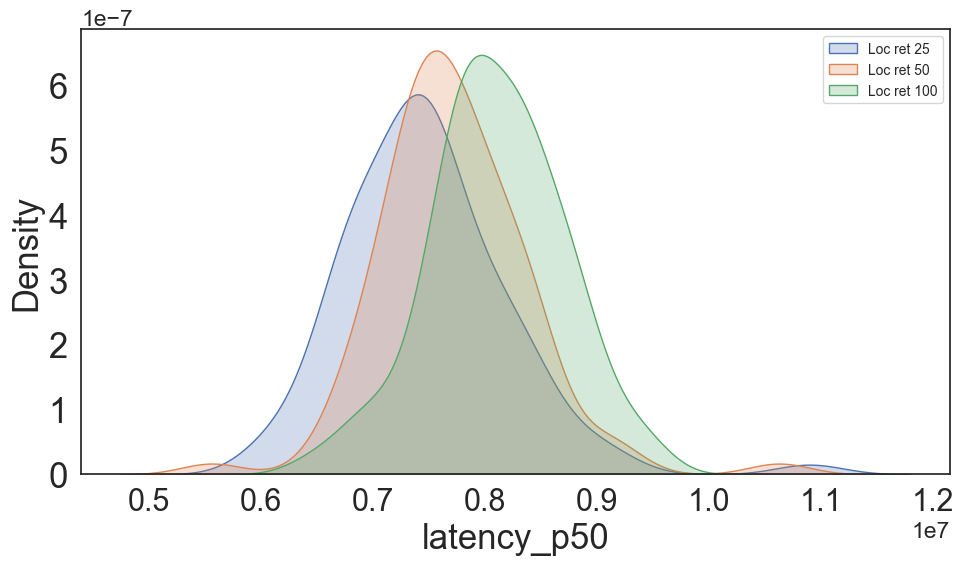

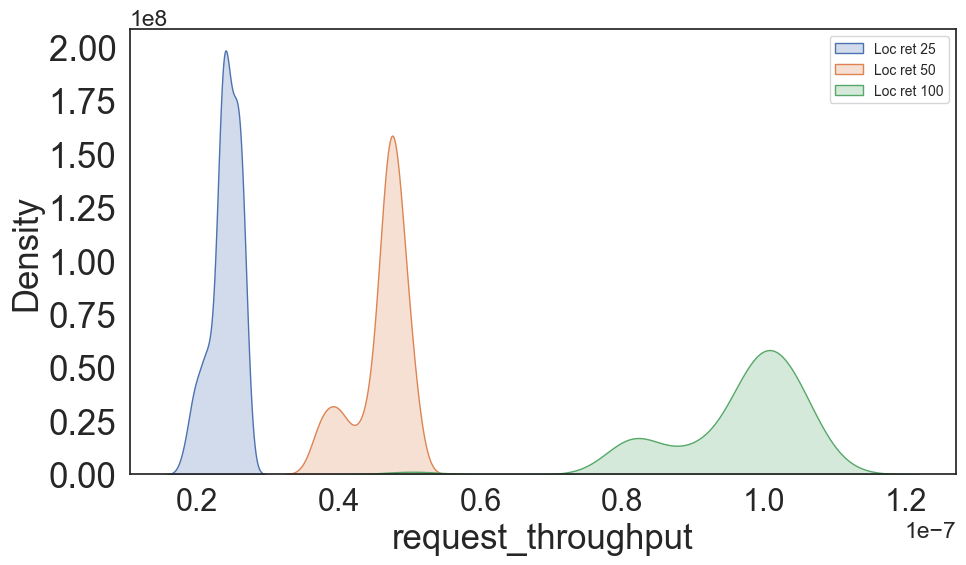

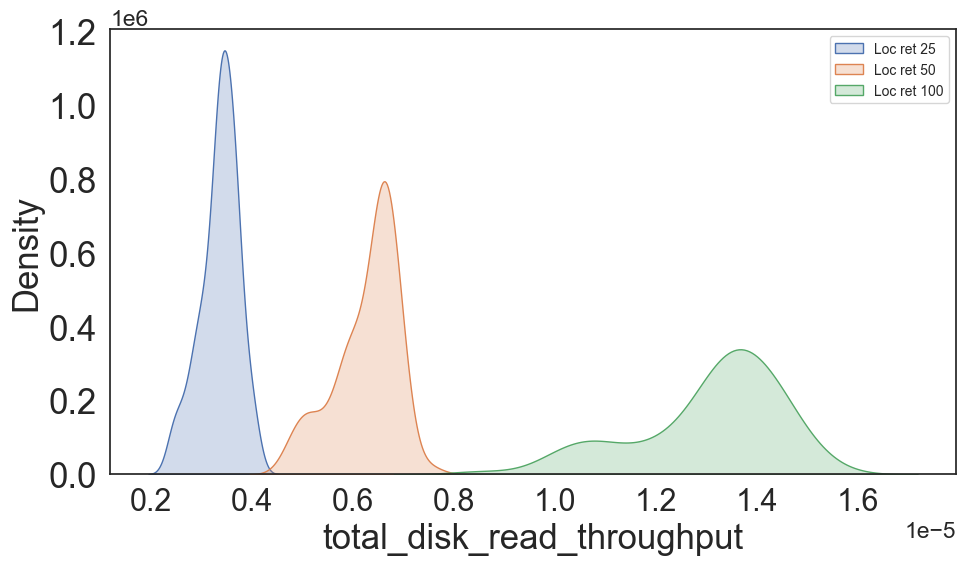

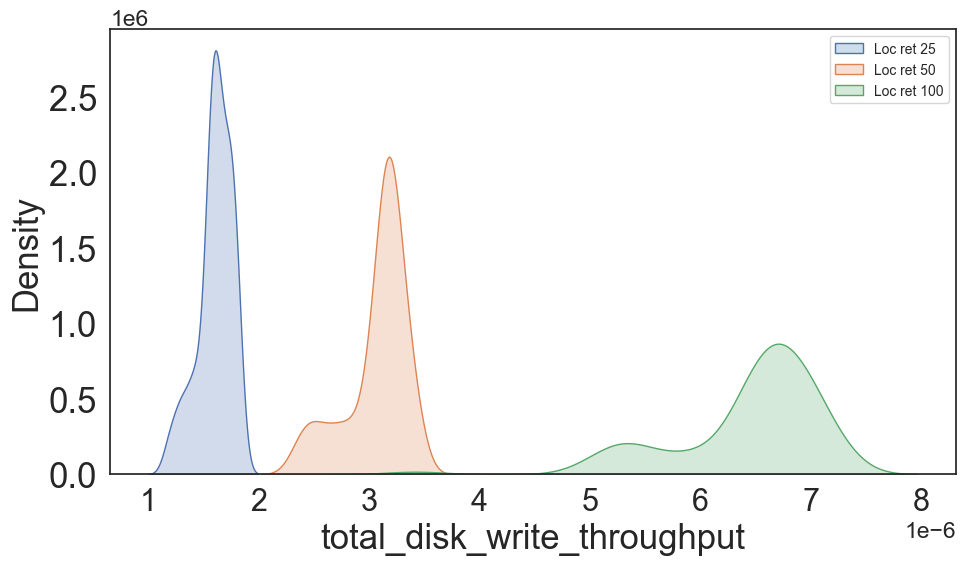

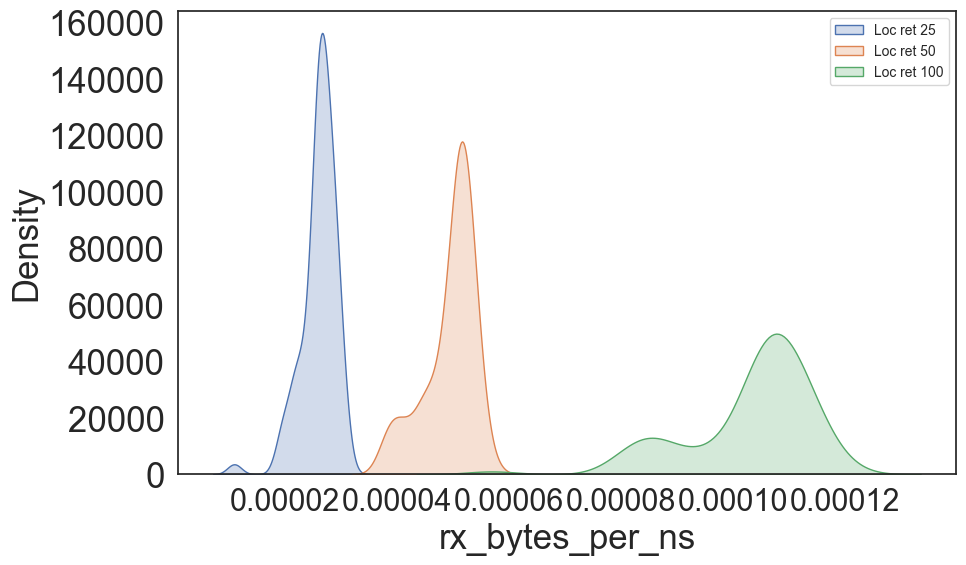

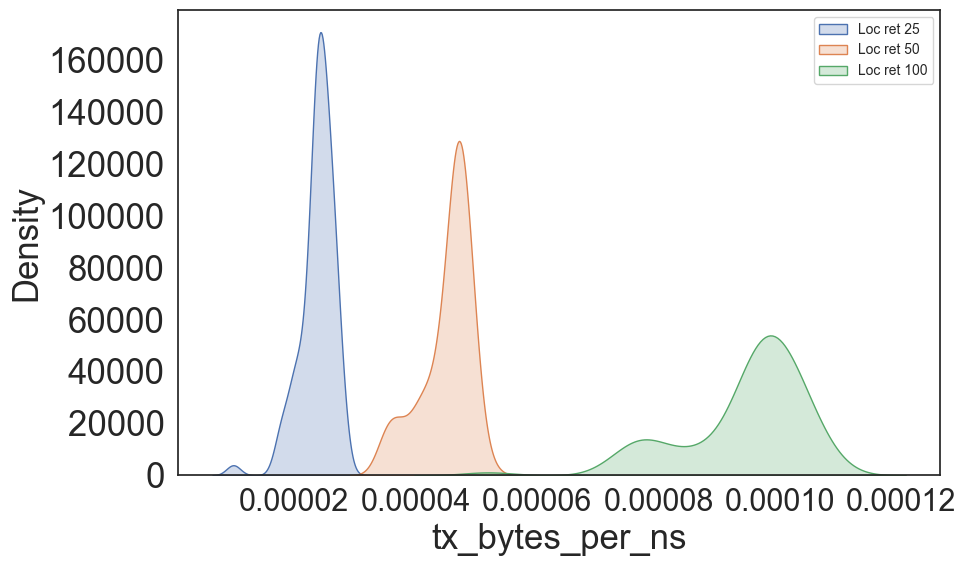

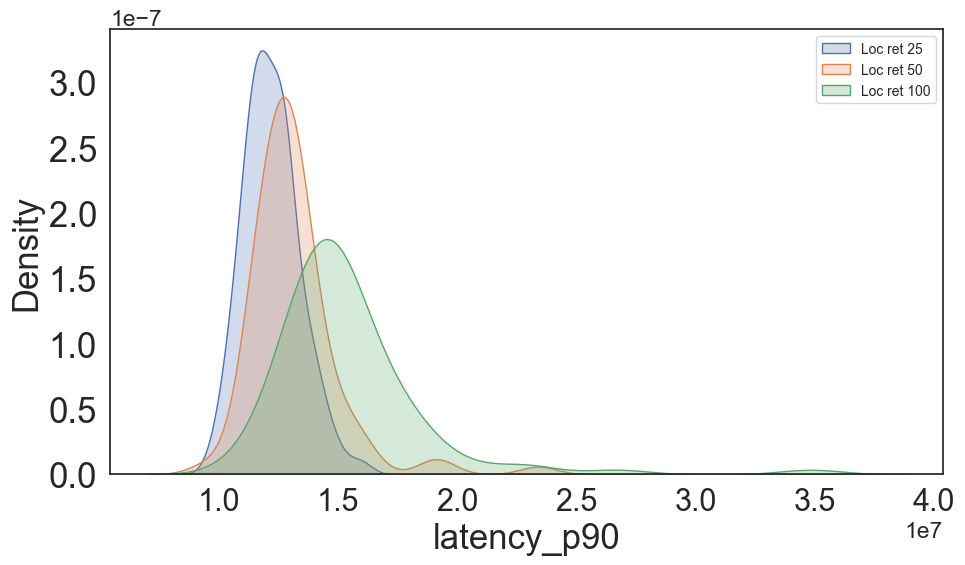

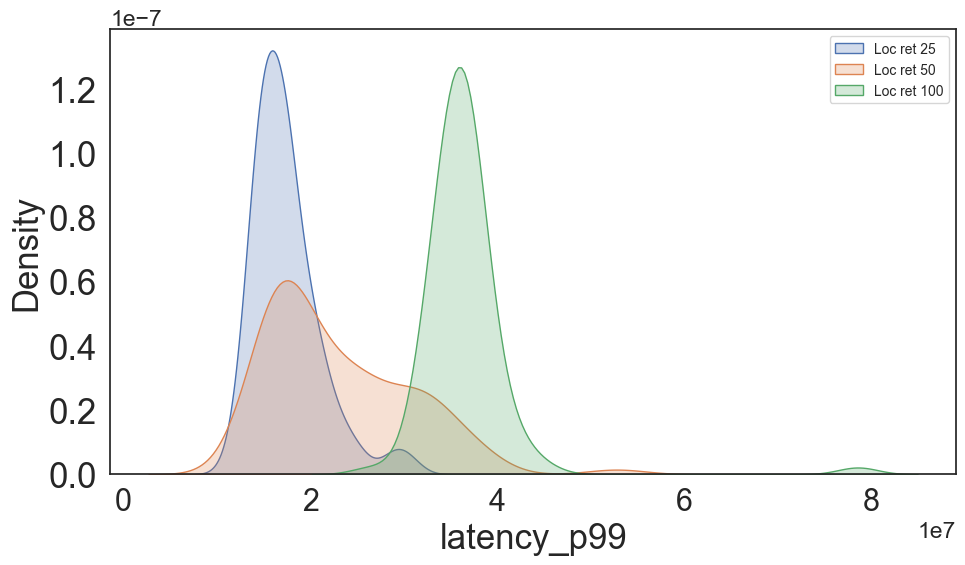

In [22]:
# Function to load and concatenate all CSV files from a folder
def load_data_from_folder(folder_path):
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_list = []
    
    for file in all_files:
        # Load each CSV file
        df = pd.read_csv(os.path.join(folder_path, file))
        
        # Extract the microservice name from the filename (assuming filename structure is 'microservice_data.csv')
        microservice_name = file.split('.csv')[0]  # Extract part before first '_'
        
        # Add the 'microservice' column
        df['microservice'] = microservice_name
        
        # Append the dataframe to the list
        df_list.append(df)
        
    return pd.concat(df_list, ignore_index=True)

# Path to the normal data folder
normal_data_folder = 'sample_dataset_for_analysis/normal_data'

# Load and concatenate CSV files from the normal folder
normal_df = load_data_from_folder(normal_data_folder)

# Assume we have a column 'microservice' that indicates the microservice for each entry
# If you don't have this column, you will need to add it based on your data structure.
# normal_df['microservice'] = [...]

# List of metrics to plot PDFs for
metrics = ['rss', 'vsize', 'cpu_usage', 'latency_p50', 'request_throughput', 'total_disk_read_throughput', 'total_disk_write_throughput', 'rx_bytes_per_ns', 'tx_bytes_per_ns', 'latency_p90', 'latency_p99']

# List of unique microservices (assuming they are identified in a 'microservice' column)
microservices = normal_df['microservice'].unique()
print(microservices),
microservices = ['locret_normal_25','locret_normal_50','locret_normal_100']  #[] #  'fd_normal',, 'preprocess_normal', 'ad_normal_nontimesynced_v1', 'ad_normal_nontimesynced_v2', , ]['fr_normal','ad_normal_timesynced', 'mdi_normal','orch_normal'] #
# Set global font scaling for seaborn
sns.set(font_scale=1.5)  # Adjust the font scale to make everything larger (increase/decrease as needed)

# Set style to remove the blue background
sns.set_style("white")  # Options: "white", "whitegrid", "dark", "darkgrid", "ticks"

# Generate a PDF plot for each metric across different microservices
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Plot the PDF for each microservice
    for microservice in microservices:
        # Filter the data for the current microservice
        microservice_data = normal_df[normal_df['microservice'] == microservice]

        label_dict = {'fd_normal':'Face Detector','fr_normal':'Face Recognizer', 'preprocess_normal':'Preprocessor', 'locret_normal_25':'Loc ret 25','locret_normal_50':'Loc ret 50','locret_normal_100':'Loc ret 100', 'ad_normal_nontimesynced_v1':'Anomaly Detector v1', 'ad_normal_nontimesynced_v2':'Anomaly Detector v2', 'ad_normal_timesynced':'Anomaly Detector timsync', 'mdi_normal':'MDI', 'orch_normal':'orches'}
        
        # Plot the KDE (PDF) for the metric
        sns.kdeplot(microservice_data[metric], label=label_dict[microservice], fill=True)
    
    # Add title and labels
    # plt.title(f'PDF of {metric} for Different Microservices', fontsize=16)
    plt.xlabel(f'{metric}', fontsize=25)
    plt.ylabel('Density', fontsize=25)

    # Increase the font size of x and y axis tick values
    plt.xticks(fontsize=22)  # Increase x-axis tick font size
    plt.yticks(fontsize=25)  # Increase y-axis tick font size
        
    plt.legend(fontsize=10)
    
    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(f'pdf_{metric}.png')
    
    # Show the plot
    plt.show()


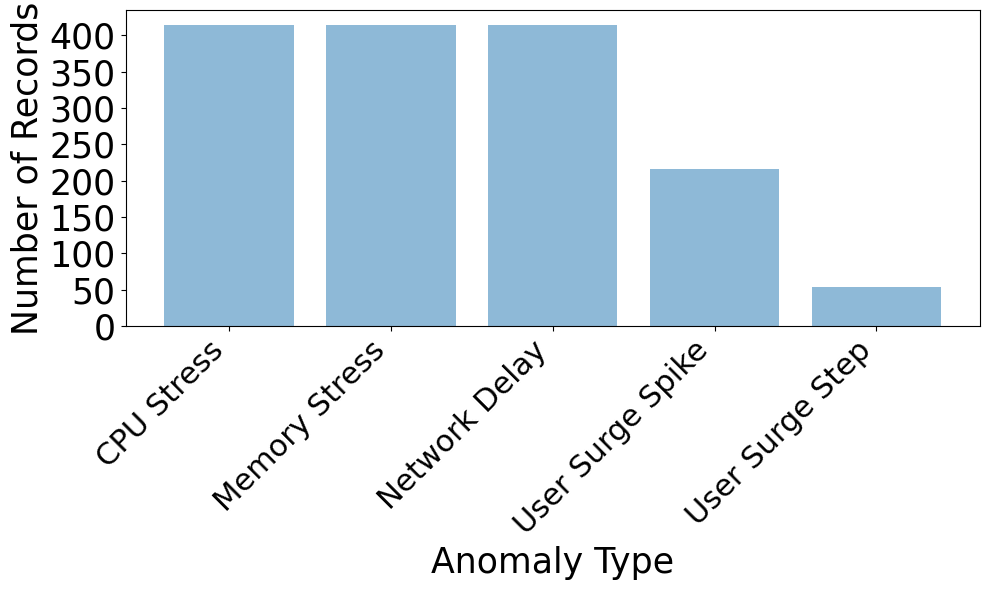

In [12]:
# Data for anomalies
anomaly_types = ["CPU Stress", "Memory Stress", "Network Delay", "User Surge Spike", "User Surge Step"]
record_counts = [414, 414, 414, 216, 54]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(anomaly_types, record_counts, color=['#8eb9d7'])
plt.xlabel("Anomaly Type", fontsize=25)
plt.ylabel("Number of Records", fontsize=25)

# Increase the font size of x and y axis tick values
plt.xticks(rotation=45, ha='right', fontsize=22)  # Increase x-axis tick font size
plt.yticks(fontsize=25)  # Increase y-axis tick font size

plt.tight_layout()
# plt.title("Distribution of Records by Anomaly Type")
plt.savefig('anomaly_distribution.png')
plt.show()


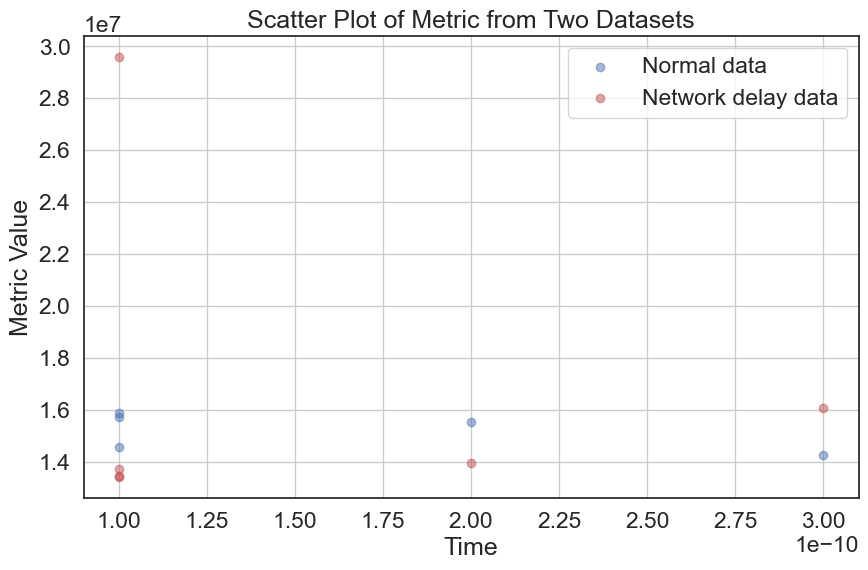

In [12]:
df = pd.read_csv('/Users/dtfernando/Documents/cloudslab/iAnomaly_supplementary_repo/sample_dataset_for_analysis/normal_data/mdi_normal.csv')
df_net_delay = pd.read_csv('/Users/dtfernando/Documents/cloudslab/iAnomaly_supplementary_repo/sample_dataset_for_analysis/anomaly_data/mdi_other_anomaly.csv')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['request_throughput'], df['latency_p50'], color='b', alpha=0.5, label='Normal data')
plt.scatter(df_net_delay['request_throughput'], df_net_delay['latency_p50'], color='r', alpha=0.5, label='Network delay data')

# Adding titles and labels
plt.title('Scatter Plot of Metric from Two Datasets')
plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

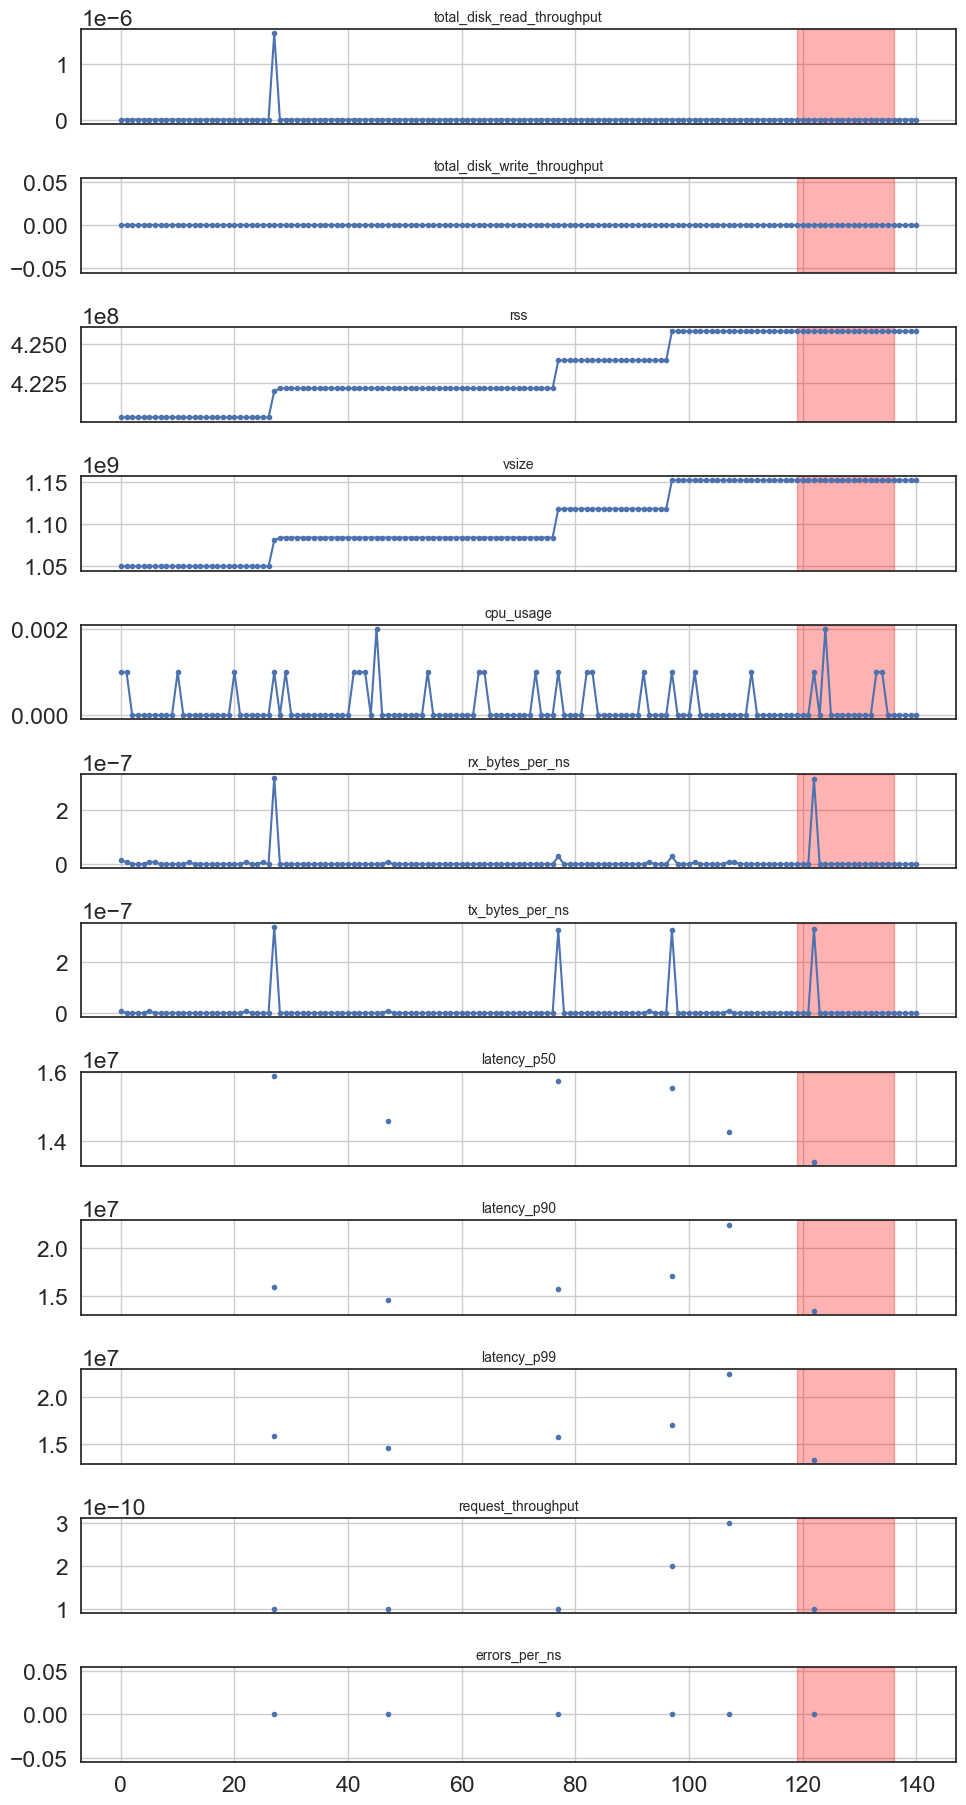

In [21]:
# Load dataset
merge_df = pd.read_csv("/Users/dtfernando/Documents/cloudslab/iAnomaly_supplementary_repo/sample_dataset_for_analysis/special_mdi_dataset_for_plotting.csv")

# Define the anomaly regions as a list of tuples (start_index, end_index)
anomaly_regions = [(119, 136)]  # Replace with your actual anomaly ranges

# Set up subplots
fig, axes = plt.subplots(12, 1, figsize=(10, 20), sharex=True)

# Define each metric and axis for plotting
metrics = [
    ("total_disk_read_throughput", "total_disk_read_throughput"),
    ("total_disk_write_throughput", "total_disk_write_throughput"),
    ("rss", "rss"),
    ("vsize", "vsize"),
    ("cpu_usage", "cpu_usage"),
    ("rx_bytes_per_ns", "rx_bytes_per_ns"),
    ("tx_bytes_per_ns", "tx_bytes_per_ns"),
    ("latency_p50", "latency_p50"),
    ("latency_p90", "latency_p90"),
    ("latency_p99", "latency_p99"),
    ("request_throughput", "request_throughput"),
    ("errors_per_ns", "errors_per_ns")
]

# Plot each metric in its respective subplot
for ax, (title, column) in zip(axes, metrics):
    ax.plot(merge_df[column], marker='o', markersize=3, label='Normal')
    # Highlight the anomaly regions
    for start, end in anomaly_regions:
        ax.axvspan(start, end, color='red', alpha=0.3)
    ax.set_title(title, fontsize=10)
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('anom.png')
plt.show()

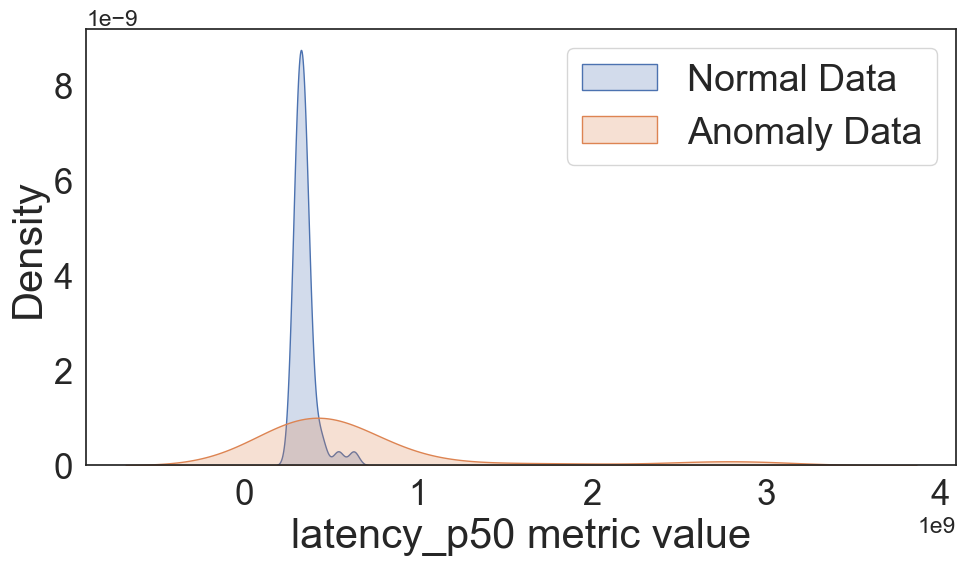

In [15]:
df = pd.read_csv('/Users/dtfernando/Documents/cloudslab/iAnomaly_dataset_analysis/final_dataset/anomaly_data/preprocess_usersurge.csv')

# Separate normal and anomaly data based on labels
normal_data = df[df['Normal/Attack'] == 0]['latency_p50']
anomaly_data = df[df['Normal/Attack'] == 1]['latency_p50']

# Set global font scaling for seaborn
sns.set(font_scale=1.5)  # Adjust the font scale to make everything larger (increase/decrease as needed)

# Set style to remove the blue background
sns.set_style("white")  # Options: "white", "whitegrid", "dark", "darkgrid", "ticks"

# Plot PDFs
plt.figure(figsize=(10, 6))
sns.kdeplot(normal_data, label='Normal Data', fill=True)
sns.kdeplot(anomaly_data, label='Anomaly Data', fill=True)

# Add labels and title
plt.xlabel('latency_p50 metric value', fontsize=30)
plt.ylabel('Density', fontsize=30)
# plt.title('PDF of Normal and Anomaly Data for Selected Metric')
# Increase the font size of x and y axis tick values
plt.xticks(fontsize=25)  # Increase x-axis tick font size
plt.yticks(fontsize=25)  # Increase y-axis tick font size
plt.legend(fontsize=27)

plt.tight_layout()
plt.savefig('latencyp50_preprocess.png')

# Show plot
plt.show()
